In [1]:
# 그림을 그리기위한 커스텀 plot 함수

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
def plot_digits(instances, images_per_row=10, **options):
    size = 28 
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")


In [2]:
#사이킷런 패키지에서 mnist 데이터 로딩
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mist

In [3]:
#mnist의 특성(그림)데이터(x)와 label(y)데이터
x, y = mnist['data'], mnist['target']
print(x.shape) # x데이터의 행 열 (70000개 데이터에는 784개의 정보가 있음(28x28))
print(y.shape) # y데이터의 행 열
print(x)
print(y) # y 데이터 보기


(70000, 784)
(70000,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' ... '4' '5' '6']


100


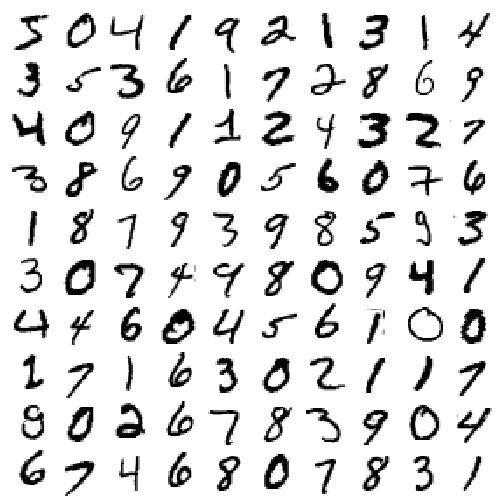

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(9,9))
#example_images = np.r_[x[:12000:600], x[12000:30000:600],x[30000:60000:600]]
example_images = np.r_[x[:100:1]]
print(len(example_images))
plot_digits(example_images, images_per_row=10)
plt.show()

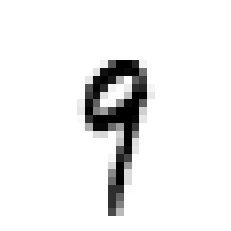

In [7]:


some_digit = x[600] #600번째 그림데이터

#plot 함수로 그림그리기
some_digit_image = some_digit.reshape(28,28) #1차원데이터를 2차원으로 변경
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary) # plt 그리기
plt.axis("off") # x,y좌표 제거
plt.show() # 보이기

array([1, 4])

In [6]:
#이진분류기 테스트
#훈련데이터와 검증데이터 추출(60000/10000)
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

#훈련데이터 섞기
#shuffle_idx = np.random.permutation(60000)
#x_train, y_train = x_train[shuffle_idx], y_train[shuffle_idx]
y_train = y_train.astype(np.int) #label데이터 정수변환
y_test = y_test.astype(np.int)   #label데이터 정수변환


In [8]:
# 9번 그림 분류하기를 위한 데이터생성
y_train_9 = (y_train == 9) # label이 8인 데이터는 True 아니면 False
y_test_9 = (y_test == 9) 

In [9]:
from sklearn.linear_model import SGDClassifier

#이진분류기 SGD모델생성 및 학습 (Stochastic Gradient Descent : 확률적 경사 하강모델)
sgd_clf = SGDClassifier(max_iter =5) # 5회 강화학습
sgd_clf.fit(x_train, y_train_9) # fit함수를 이용해 8이나 아니냐를 학습


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
#사진의 그림을 9라고 예측했는지 확인
sgd_clf.predict([some_digit]) 

array([ True])

In [11]:
# 학습데이터 k 교차검증 k=5
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_9, cv=5, scoring='accuracy')

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarnin

array([0.92767269, 0.93658333, 0.94316667, 0.94725   , 0.94057838])

In [13]:
from sklearn.metrics import confusion_matrix
#예측 결과 confused table
y_test_pred = sgd_clf.predict(x_test)
confusion_matrix(y_test_9, y_test_pred)
# 세로가 실제 가로가 예측

array([[8617,  374],
       [ 130,  879]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score, recall_score
#정밀도 체크  계산 = 697/(697+312)  해석:실제1009개 중에 697개를 9라고 예측하였다.
precision_score(y_test_pred, y_test_9)

0.8711595639246779

In [16]:
#재현률 체크 계산 697/(697+189)  해석 : 9라고 예측한 886개중 697개가 실제로 9였다.
recall_score(y_test_pred, y_test_9)

0.7015163607342378

In [17]:
from sklearn.metrics import f1_score
#f1 스코어 계산 = 2 * (정밀도*재현률) / (정밀도+재현률)
f1_score(y_test_pred, y_test_9)
# 정밀도와 재현률이 높고 유사하게 나오면 F1 스코어도 높게 나타난다
# 그러나 성능개선을 한다면 정밀도와 재현률중 하나만 선택해야한다.(서로 반대관계)
#성능평가시 정밀도와 재현율을 같이 보면서 설명하는것이 좋다

#정밀도가 높은것이 유리한 예시1(성인물영상분류)
# 성인물영상을 감지해서 성인물을 필터링한 결과만 미성년자에게 보여주는 프로그램을 만든다면
# 일반영상이 좀 필터링 되더라도 성인물 감지율를 높이는 것이좋다
# 정밀도 90%(실제성인물중 90%를 성인물로 예측함) , 재현률 60% (예측한 성인물중 60%가 실제성인물, 40%가 일반)

#정밀도가 높은것이 유리한 예시2(CCTV 감시)
# CCTV로 침입을 감지하여 경비원 호출을 하는 시스템이 있다면
# 경비원이 자주 호출되더라도 침입을 막는것이 좋다.
# 정밀도 99%(실제침입 중 99%를 침입으로 예측), 재현률 30% (예측한 침입중 30%가 실제 침입)

# 결론 => 정밀도를 높이려면 재현률을 얼마나 희생시킬 것인지 고려해야한다!

0.7771883289124668

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, x_train, y_train_9, cv=3, method="decision_function")
print(y_scores) # y_score는 계산된 실제 수치를 의미함. 
#y_score에서 특정 threshold 값을 기준으로 TRUE/FLASE를 구분
#일반적으로 threshold는 F1스코어가 가장 높은 상황을 선택함.(아래 그림 참고)
precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[-783099.7417943  -790016.59212689 -722219.43890723 ... -683394.10375982
 -554284.00868473   17987.84341403]


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


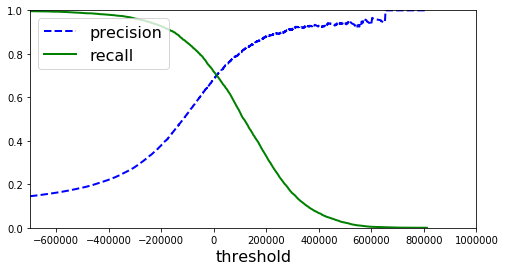

In [30]:
# threshold trade off확인을 위한 플로팅 함수
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="recall", linewidth=2)
    plt.xlabel("threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 1000000])  #threshold의 범위

plt.show()

In [20]:
#임계값 조절을 통한 정밀도 조절
y_train_pred_90 = (y_scores > 200000)
print('precision_score :',precision_score(y_train_9, y_train_pred_90))
print('recall_score :', recall_score(y_train_9, y_train_pred_90))

precision_score : 0.7301398393335317
recall_score : 0.41250630358043366


In [21]:
# 검증데이터를 통한 확인
y_test_scores = cross_val_predict(sgd_clf, x_test, y_test_9, cv=3, method="decision_function")
y_test_pred_90 = (y_test_scores > 200000)
print('precision_score :',precision_score(y_test_9, y_test_pred_90))
print('recall_score :', recall_score(y_test_9, y_test_pred_90))

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


precision_score : 0.6530264279624893
recall_score : 0.759167492566898


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


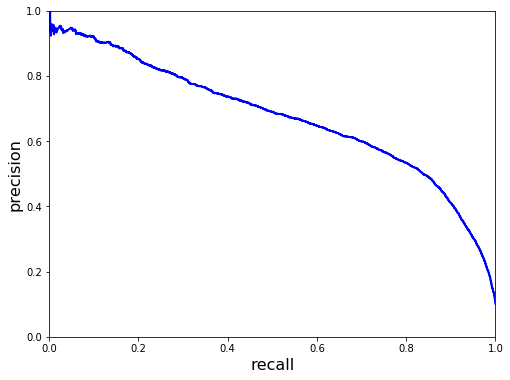

In [22]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("recall", fontsize=16)
    plt.ylabel("precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

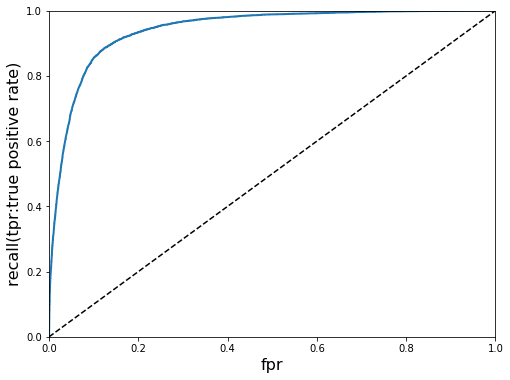

In [23]:
# ROC 곡선을 통한 성능확인
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)
#tpr(true positive rate) = tp / (fp + tp) => 재현률과 같음
#fpr : (false positive rate) = fp / (tn + fp)


#           pred f      t
# real  f     tn       fp
#       t     fn       tp
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('fpr', fontsize=16)
    plt.ylabel('recall(tpr:true positive rate)', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()
# 코너링이 왼쪽상단으로 갈수록 좋다 := 면적이 넓을수록좋다

In [24]:
from sklearn.metrics import roc_auc_score
# ROC 커브 면적계산하기
roc_auc_score(y_train_9, y_scores)

0.9422754915489671

In [25]:
#SGD와 랜덤포레스트 기법의 비교
#랜덤포레스트 모델 생성
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_9, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9, y_scores_forest)

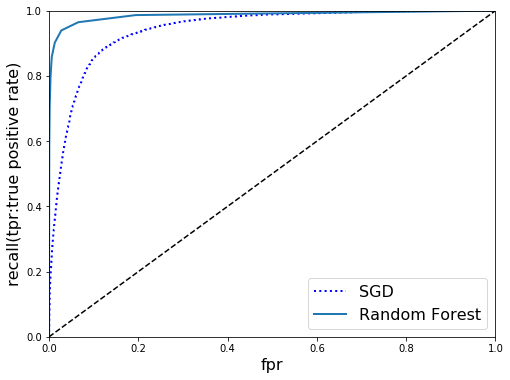

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [121]:
#다중분류기 SGD모델생성  (0~9 까지 모두 예측해보기)
sgd_clf.fit(x_train, y_train) #전체 학습
sgd_clf.predict([some_digit]) #위의 사진(9)의 데이터 예측 


C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([9])

In [122]:
#다중분류기 결과값 확인 : 가장 높은 수치를 레이블 데이터로 봄
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-562074.9914493 , -132111.59754402, -445887.86156402,
        -152943.44358302, -100752.89188964, -108297.52477938,
        -259980.38991896, -151882.86553372,  109911.59279058,
         189952.05815934]])

In [123]:
#argmax는 최대값을 가진 인덱스를 출력함
np.argmax(some_digit_scores)

9

In [124]:
#분류기에서 사용중인 label
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [125]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.87257548, 0.86719336, 0.860029  ])

In [126]:
#표준화(Scale)를 통한 정확도 향상시키기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#훈련데이터와 검증데이터의 특성값을 표준화
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
x_test_scaled = scaler.fit_transform(x_test.astype(np.float64))

# 교차검증
print(cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring='accuracy'))
print(cross_val_score(sgd_clf, x_test_scaled, y_test, cv=3, scoring='accuracy'))

C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[0.90796841 0.90764538 0.91208681]


C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[0.8687837  0.89318932 0.90387504]


C:\Users\jang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [128]:
#confused table로 성능확인
y_test_pred = sgd_clf.predict(x_test_scaled)
conf_mat = confusion_matrix(y_test, y_test_pred)
conf_mat


array([[ 934,    0,    9,    3,    0,   13,   12,    6,    1,    2],
       [   0, 1124,    5,    0,    0,    1,    4,    0,    0,    1],
       [  36,   84,  693,   89,   10,    7,   51,   14,   41,    7],
       [  27,   68,   12,  786,   16,   12,    5,   26,   37,   21],
       [   8,   11,   17,    3,  797,    6,   13,   19,    2,  106],
       [  33,   33,    8,   36,   40,  637,   28,   20,   38,   19],
       [  21,    8,   20,    0,    9,    9,  888,    1,    2,    0],
       [   0,   20,   12,    7,    6,    3,    1,  892,    2,   85],
       [  42,   93,    7,   11,   63,   90,    7,   24,  593,   44],
       [  10,   14,    2,    9,   26,    1,    0,   39,    7,  901]],
      dtype=int64)

In [129]:
#knn 분류기를 통한 모델링
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [130]:
# 검증데이터로 성능확인
y_test_pred = sgd_clf.predict(x_test)
conf_mat = confusion_matrix(y_test, y_test_pred)
conf_mat

array([[ 937,    0,    0,    3,    4,    8,   10,    4,   11,    3],
       [   0, 1019,    0,    3,    0,    1,    3,    1,  108,    0],
       [  14,   15,  586,  111,   19,    7,   31,   15,  222,   12],
       [   6,    0,    0,  829,    8,   21,    2,    6,  126,   12],
       [   1,    0,    4,    3,  873,    0,    9,    0,   27,   65],
       [   5,    2,    0,   30,   16,  678,   11,    9,  133,    8],
       [   9,    1,    1,    2,    9,   15,  875,    1,   45,    0],
       [   2,    4,    3,   15,   12,    3,    0,  858,   32,   99],
       [   5,    7,    0,   11,   14,   21,    2,    4,  901,    9],
       [   5,    3,    0,   11,   25,    7,    1,   11,   47,  899]],
      dtype=int64)

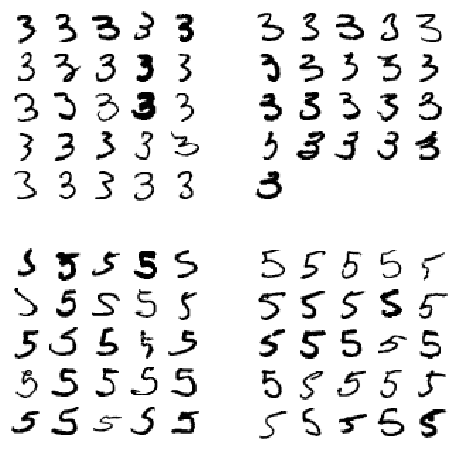

In [131]:
# 3과 5에 대한 분류현황보기
a, b = 3, 5
aa = x_test[(y_test == a) & (y_test_pred == a)] #3을 3이라고 예측한 샘플(정답)
ab = x_test[(y_test == a) & (y_test_pred == b)] #3을 5라고 예측한 샘플 (오답)
ba = x_test[(y_test == b) & (y_test_pred == a)] #5을 3이라고 예측한 샘플(정답)
bb = x_test[(y_test == b) & (y_test_pred == b)] #5을 5라고 예측한 샘플(오답)

#그림으로 나타내기
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(bb[:25], images_per_row=5)
plt.show()